### START

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Import Spotify 2023 data
Music = pd.read_csv('spotify-2023.csv')
Music

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### OVERVIEW OF DATA SET

In [8]:
# Show the Number of Rows and Columns
num_rows, num_columns = Music.shape
print("Number of Rows: ",num_rows)
print("Number of Columns: ",num_columns)

Number of Rows:  953
Number of Columns:  24


In [9]:
# Show what are the data types of each columns
print("Data Types: ")
print(Music.dtypes)

Data Types: 
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [10]:
# Look for the Missing Values
No_Value = Music.isna().sum()
print(No_Value[No_Value > 0])

in_shazam_charts    50
key                 95
dtype: int64


### BASIC DESCRIPTIVE STATISTICS

In [12]:
# In order to calculate the statistics mean, median, and standard deviation of "streams," the streams column must be defined and separated into a numerical value.
streams_column = Music['streams'].tolist()
streams_column_series = pd.Series(streams_column)
streams_column_series = pd.to_numeric(streams_column_series, errors='coerce')

# In case of NaN value
print("NaN values in data:", streams_column_series.isna().sum())
streams_column_series = streams_column_series.dropna()


NaN values in data: 1


In [13]:
# Calculation for the mean, median, and standard deviation for "streams".
streams_mean = streams_column_series.mean()
streams_median = streams_column_series.median()
streams_std = streams_column_series.std()

In [14]:
print("Streams Mean: ", streams_mean)
print("Streams Median: ", streams_median)
print("Streams Standard Deviation: ", streams_std)

Streams Mean:  514137424.93907565
Streams Median:  290530915.0
Streams Standard Deviation:  566856949.0388832


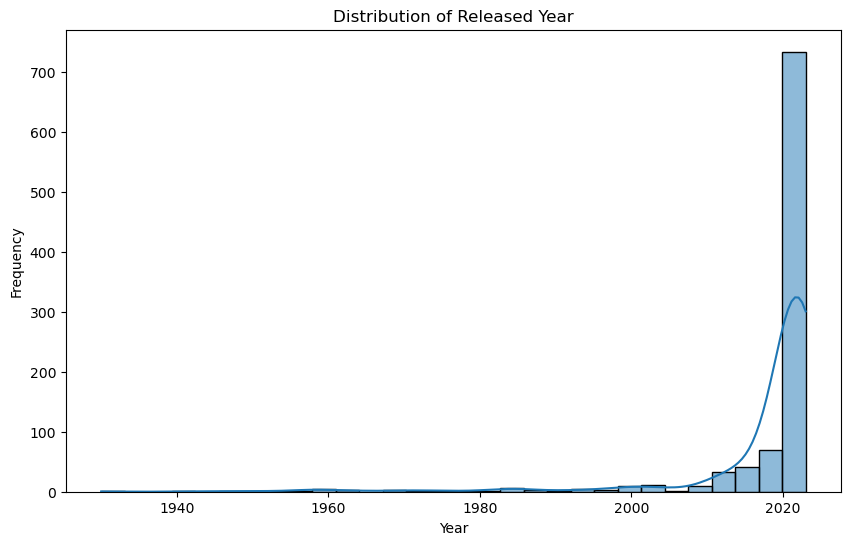

In [15]:
# Plot of Released Year
plt.figure(figsize=(10, 6))
sns.histplot(Music['released_year'], bins=30, kde=True)
plt.title('Distribution of Released Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

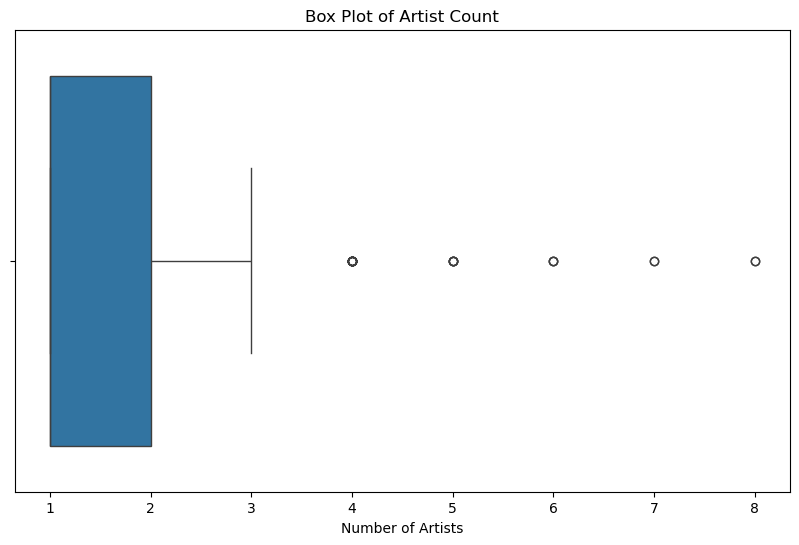

In [16]:
# Plot of Artist Count
plt.figure(figsize=(10, 6))
sns.boxplot(x=Music['artist_count'])
plt.title('Box Plot of Artist Count')
plt.xlabel('Number of Artists')
plt.show()

###  TOP PERFORMERS

In [26]:
# Shows the track with the highest number of streams along with the top 5 most streamed tracks
Music['streams'] = pd.to_numeric(Music['streams'], errors='coerce')
Top_Streams = Music.loc[Music['streams'].idxmax()]
Top_5 = Music.nlargest(5, 'streams')

print("Track with the highest number of streams:")
print(f"Track Name: {Top_Streams['track_name']}")
print("\nTop 5 Most Streamed Tracks:")
Top_5[['track_name', 'streams']]

Track with the highest number of streams:
Track Name: Blinding Lights

Top 5 Most Streamed Tracks:


,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


In [29]:
# Shows the top 5 most frequent artists based on the number of tracks in the dataset
Top_5_Artists = Music['artist(s)_name'].value_counts().head(5)

print("Top 5 Most Frequent Artists:")
Top_5_Artists

Top 5 Most Frequent Artists:


artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

### TEMPORAL 

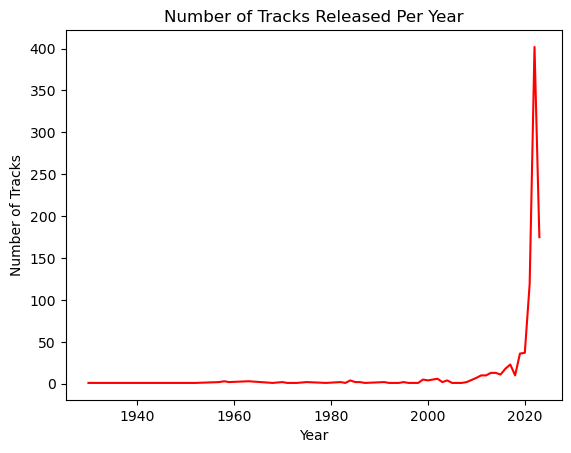

In [55]:
# Group the released day, month, and year to measure the time
tracks_day = Music.groupby('released_day').size()
tracks_month = Music.groupby('released_month').size()
tracks_year = Music.groupby('released_year').size()

# Shows the plot of tracks per year
tracks_year.plot(kind='line', color='red', label='Number of Tracks')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.show()

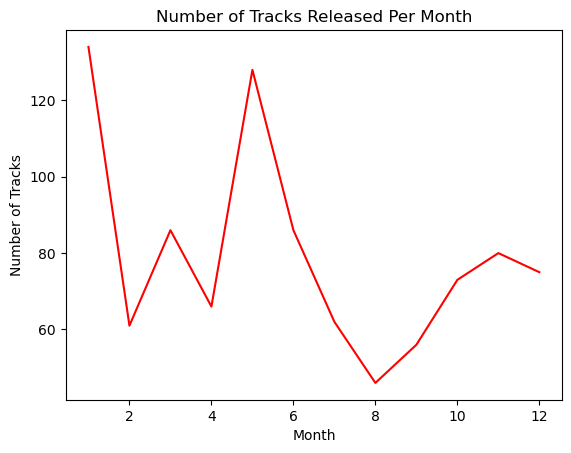

In [57]:
tracks_month.plot(kind='line', color='red', label='Number of Tracks')
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.show()

In [78]:
# Shows the Top Month of released track
Top_Released_Month = tracks_month.idxmax()
Top_Released_Count = tracks_month.max()
print(f"The year with the most tracks released is {Top_Released_Month} with {Top_Released_Count} tracks.")

The year with the most tracks released is 1 with 134 tracks.


### GENRE AND MUSIC CHARACTERIZATION

In [101]:
correlation = Music[['streams', 'bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%']].corr()
correlation

,streams,bpm,danceability_%,energy_%,valence_%,acousticness_%
streams,1.000000,-0.002438,-0.105457,-0.026051,-0.040831,-0.004485
bpm,-0.002438,1.000000,-0.147095,0.025794,0.041195,-0.017694
danceability_%,-0.105457,-0.147095,1.000000,0.198095,0.408451,-0.236165
energy_%,-0.026051,0.025794,0.198095,1.000000,0.357612,-0.577344
valence_%,-0.040831,0.041195,0.408451,0.357612,1.000000,-0.081907
acousticness_%,-0.004485,-0.017694,-0.236165,-0.577344,-0.081907,1.000000


In [103]:
# Shows the Correlation between danceablilty% and acousticness%
DE_correlation = correlation.loc['danceability_%', 'energy_%']

# Shows the Correlation between valence% and acousticness%
VA_correlation = correlation.loc['valence_%', 'acousticness_%']

print(f"\nCorrelation between Danceability and Energy: {DE_correlation}")
print(f"Correlation between Valence and Acousticness: {VA_correlation}")


Correlation between Danceability and Energy: 0.1980948483762567
Correlation between Valence and Acousticness: -0.08190727483082776


### PLATFORM POPULARITY

In [167]:
# Calculate the sum and average number of tracks on each platform
Playlist = {
    'Total in Spotify Playlists': Music['in_spotify_playlists'].sum(),
    'Total in Spotify Charts': Music['in_spotify_charts'].sum(),
    'Total in Apple Playlists': Music['in_apple_playlists'].sum(),
    'Average in Spotify Playlists': Music['in_spotify_playlists'].mean(),
    'Average in Spotify Charts': Music['in_spotify_charts'].mean(),
    'Average in Apple Playlists': Music['in_apple_playlists'].mean()}

# Using for loop to show the data
for key, value in Playlist.items():
    print(f"{key}: {value}")

Total in Spotify Playlists: 4955719
Total in Spotify Charts: 11445
Total in Apple Playlists: 64625
Average in Spotify Playlists: 5200.124868835257
Average in Spotify Charts: 12.009443861490032
Average in Apple Playlists: 67.8121720881427


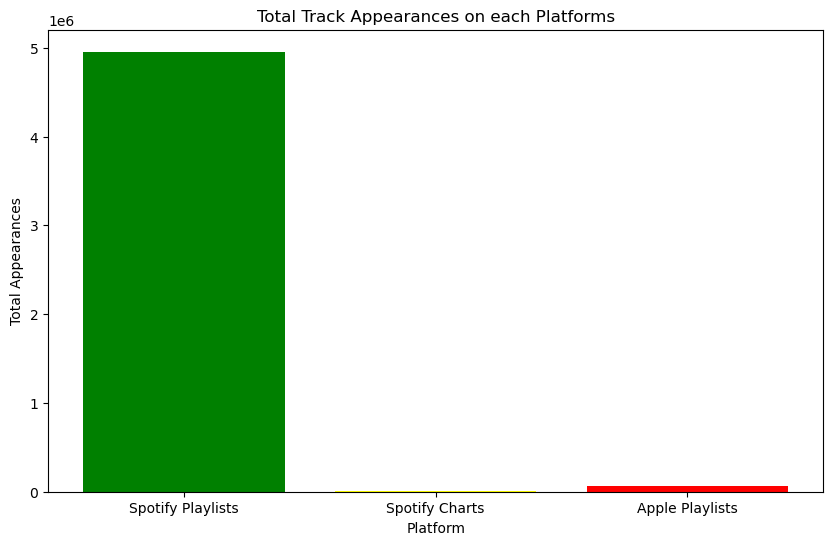

In [165]:
# Compare and collate each platform
Platform_Tracks = [
    Playlist['Total in Spotify Playlists'],
    Playlist['Total in Spotify Charts'],
    Playlist['Total in Apple Playlists']
]

# Visualization of the comparison of each platform
Labels = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']
plt.figure(figsize=(10, 6))
plt.bar(Labels, Platform_Tracks, color=['green', 'yellow', 'red'])
plt.title('Total Track Appearances on each Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Appearances')
plt.show()

### ADVANCE ANALYSIS

In [169]:
# Shows the pattern given among tracks with the same key and/or mode
KM_streams = Music.groupby(['key', 'mode'])['streams'].mean().unstack()

print("Average Streams by Key and Mode:")
KM_streams

Average Streams by Key and Mode:


mode,Major,Minor
key,,
A,4.019603e+08,4.173906e+08
A#,6.275336e+08,4.849231e+08
B,4.363336e+08,5.825110e+08
C#,6.285883e+08,5.665252e+08
D,5.720180e+08,3.425588e+08
D#,6.819623e+08,4.793647e+08
E,7.605963e+08,5.083264e+08
F,5.279311e+08,4.102836e+08
F#,4.175450e+08,5.954921e+08


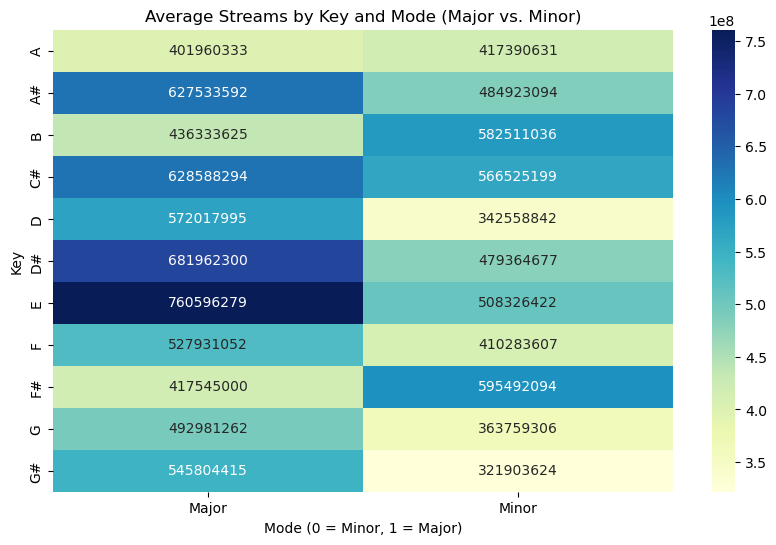

In [205]:
# Shows the visual representation of the key and mode streams
plt.figure(figsize=(10, 6))
sns.heatmap(KM_streams, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Average Streams by Key and Mode (Major vs. Minor)')
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Key')
plt.show()

In [207]:
# Calculate total appearances in playlists and charts for each artist
AP_appearance = Music.groupby('artist(s)_name')[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()
AP_appearance['total_appearances'] = AP_appearance.sum(axis=1)

# Analysis of the appearance of the top 10 Artists'
Top_Artists = AP_appearance.nlargest(10, 'total_appearances')
print("Top 10 Most Frequently Appearing Artists in Playlists and Charts:")
Top_Artists

Top 10 Most Frequently Appearing Artists in Playlists and Charts:


,in_spotify_playlists,in_spotify_charts,in_apple_playlists,total_appearances
artist(s)_name,,,,
The Weeknd,144053,180,1677,145910
Taylor Swift,132974,542,1796,135312
Ed Sheeran,128758,94,1448,130300
Harry Styles,110026,185,1741,111952
Eminem,87331,152,475,87958
Arctic Monkeys,84016,190,241,84447
Coldplay,75716,72,381,76169
Avicii,68241,42,407,68690
"Dr. Dre, Snoop Dogg",65728,0,283,66011


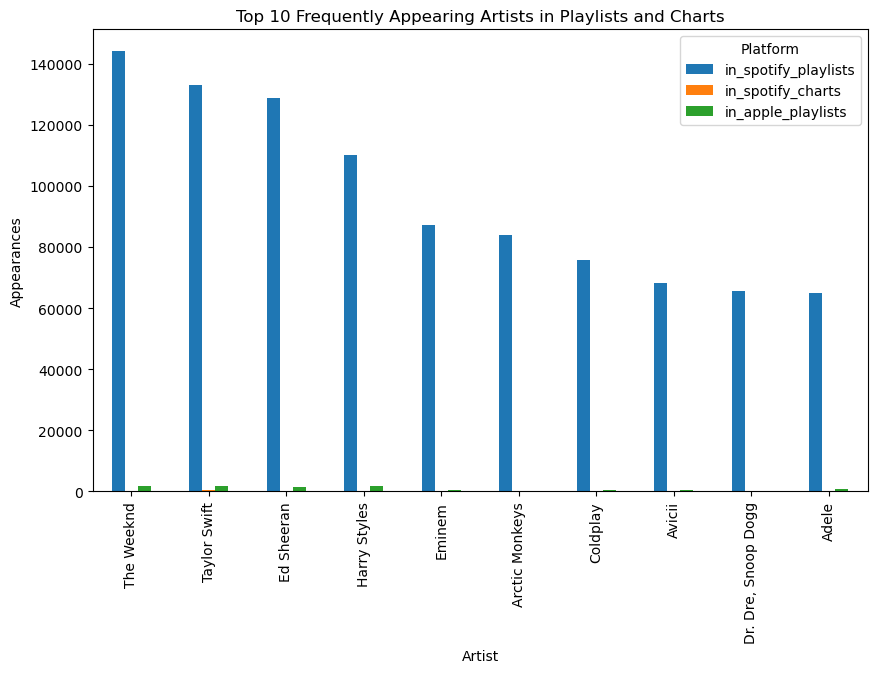

In [209]:
# Shows the plot of the top 10 Artists' Appearance
Top_Artists[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Frequently Appearing Artists in Playlists and Charts')
plt.xlabel('Artist')
plt.ylabel('Appearances')
plt.legend(title="Platform")
plt.show()